# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

<AxesSubplot:title={'center':'Figure 1'}, xlabel='Ethnicity'>

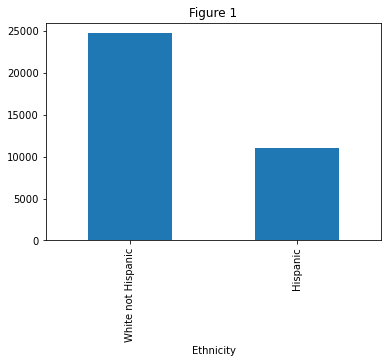

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ca_dds_expenditures.csv')

# Grouping mean of expenditures by ethnicity
avg_expenditures = df.groupby(['Ethnicity'])['Expenditures'].mean()

# Plotting only White and Hispanic values
avg_expenditures.loc[['White not Hispanic', 'Hispanic']].plot(kind="bar", title="Figure 1")

**YOUR EXPLANATION HERE**

From the plot we can see that on average white (not Hispanic) residents received more than twice the expenditures than Hispanic residents, indicating there may be a bias favoring white (not hispanic) residents.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

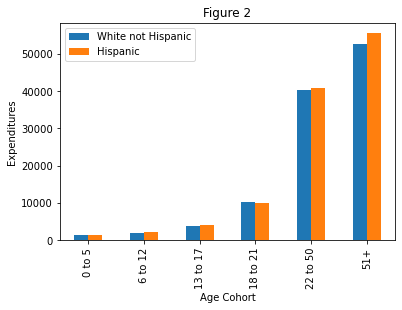

In [2]:
# Grouping mean of expenditures by ethnicity and age cohort
avg_expenditures_cohort = df.groupby(['Ethnicity', 'Age Cohort'])['Expenditures'].mean()

# Pulling values from multi-indexed series to replot in an easier to interpret format
white_exp = avg_expenditures_cohort.loc[['White not Hispanic']].tolist()
hispan_exp =  avg_expenditures_cohort.loc[['Hispanic']].tolist()
white_exp.insert(1, white_exp.pop())
hispan_exp.insert(1, hispan_exp.pop())
comp_df = pd.DataFrame({"White not Hispanic": white_exp, "Hispanic": hispan_exp})
ax = comp_df.plot(kind="bar", title="Figure 2")
ax.set_xlabel("Age Cohort")
ax.set_ylabel("Expenditures")
ix = avg_expenditures_cohort.loc[['White not Hispanic']].index.droplevel(0).tolist()
ix.insert(1, ix.pop())
ax.set_xticklabels(ix)
plt.show()


**YOUR EXPLANATION HERE**

Conversely to our findings in the previous question, the average spending per age group is nearly identical among hispanic and white (not hispanic) residents, which goes against the previous chart's indication that there may be evidence of discrimination in the DDS.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

The discrepancy between the two analyses can be explained by looking Figures 2 and 3 side by side. From Figure 2, one can see that the allocated expenditures seem to be equally distributed across the different age cohorts, with less expenditures for younger age cohorts and higher expenditures for older age cohorts. The difference between the average expenditures seen in Figure 1 then, can be explained in the vastly different age distributions between the White not Hispanic and Hispanic groups in Figure 3. The number of White not Hispanic consumers is far greater than that of Hispanic consumers in the 22-50 and 51+ age cohorts. These age cohorts also happen to be where most of the expenditures were allocated. The majority of the Hispanic consumer population seems to reside in age cohorts 0-5, 6-12, 13-17, and 18-21, where funding is not as great.

This makes sense, since consumers between ages 0-17 usually do not need as much funding as the older consumers, under whom their care should be anyway. In other words, the Hispanic consumer population is much younger than that of the White not Hispanic consumer population.

Thus, the difference in average expenditures between the two groups can be justified, because it is clear from Figure 2 that the DDS based their expenditures on the factor of age, and the average expenditures are consistent between Hispanics and White not Hispanics. 

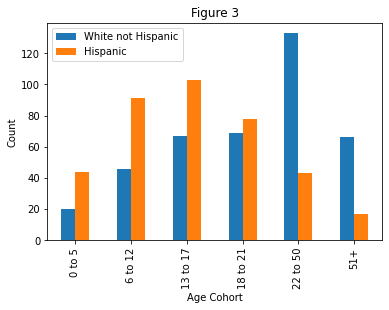

In [3]:
# Adding a count column for easier tallying with groupby.sum()
df['Count'] = 1
age_counts = df.groupby(['Ethnicity', 'Age Cohort'])['Count'].sum()

# Pulling values from multi-indexed series to replot in an easier to interpret format
white_num = age_counts.loc[['White not Hispanic']].tolist()
hispan_num =  age_counts.loc[['Hispanic']].tolist()
white_num.insert(1, white_num.pop())
hispan_num.insert(1, hispan_num.pop())
comp_df = pd.DataFrame({"White not Hispanic": white_num, "Hispanic": hispan_num})
ax = comp_df.plot(kind="bar", title="Figure 3")
ax.set_xlabel("Age Cohort")
ax.set_ylabel("Count")
ax.set_xticklabels(ix)
plt.show()

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope.
4. Demo your lab.